# One Discipline: Two Paradigms




### Symbolic AI
<img style="float: right;" src="figures/types_of_Problem_and_AI/mind.png">
Inspired by ideas of the mind and  building on thousands of years of philosophy about:

- what can be known,  
world models, absolute truths
- types of logic, 
- facts, rules, ...

Reasoning with symbols that 'stand for' external entities or 'truths'.
 - this was mainstream AI for decades


### Computational AI: 
<img style="float: right;" src="figures/types_of_Problem_and_AI/brain.jpg">

Inspired by the idea of problem solving arising from  computational processes 
- the brain  
a neural signal processor  
with adaptive connections
- Genetics + Darwinian evolution 
- Social Insect Colonies

All _appear_ to exhibit intelligent problem solving behaviour

 

# How would you describe these three types of fruit?

<div height = 30%>
    <div width=10% >  <img src="./figures/types_of_Problem_and_AI/green_apple.jpg" alt="Picture of an apple">   </div>
</div>  

<div height = 30%>
    <div width=10%>
        <img src="./figures/types_of_Problem_and_AI/orange.jpg" alt="Picture of an orange">   </div>
</div>  

<div height = 30%>
<div width=10%>  <img src="./figures/types_of_Problem_and_AI/banana.jpg" alt="Picture of a banana">   </div>
</div>  

Many people might say:
- Apples are green and round and have smooth skin
- Oranges are orange and round and have rough skin
- Bananas are yellow and long and pointed at both ends and have smooth skin. 

## Symbolic AI says that these are all examples of an abstract class 
e.g. 'Apples', 'Oranges' or 'Bananas'.

To reason about them we make statements in a 'world-model' that are True or False for things of that type
 - A **Model** encoding human expertise is often  called the **'knowledge base'**

A mixture of **Facts**

|          | Apples | Oranges | Bananas |
|----------|--------|---------|---------|
| isGreen  | True   |         |         |
| IsOrange |        | True    |         |
| isYellow |        |         | True    |
| isRound  | True   | True    |         |
| isLong   |        |         | True    |
| isRough  |        | True    |         |
| isSmooth | True   |         | True    |

 And  **logic**   

usually **Rules** that we can apply to generate new facts  

_isRound(x)_ AND _isGreen(x)_  AND _isSmooth(x)_   => _isApple(x)_

_isRound(x)_ AND _isOrange(x)_ AND _isRough(x)_    => _isOrange(x)_

_isLong(x)_  AND _isYellow(x)_ AND _isSmooth(x)_   => _isBanana(x)_

## Using a symbolic AI model for prediction

 <img style="float:right" src = "figures/types_of_Problem_and_AI/lime.jpg">
 
1. Create the **model** by encoding this knowledge  using rules in your chosen type of  logic 
 


 
2. provide **input** in the form of 'assertions' about a new bit of fruit
 - _isRound(newfruit)_ = True
 - _isGreen(newfruit)_ = True
 
 
3. Make a **prediction** by applying logic (deduction) to infer the _**output**_ 
 - _isApple(newfruit)_ = False

## Making this work better

 - 'Closed World Assumption':  
 fill in the gaps in the table by saying  
 "if we don't know it's true, assume it is false"
 
 - Make 'higher level' statements to reduce the number of things to consider  
 'all rough things are not smooth **and vice versa**' 
 
 
 - Logic can be multi-step:  
separate new facts about this instance from world model
 
Once you've defined a model you can use it:
- 'forwards' (data driven) for **prediction**, 
- 'backwards' (goal-driven) for  **optimisation/planning**.

# Take a moment to think if you can see any problems with this

### Let's  look at fruit colour, width,height,weight
#### Colour    
from www.colorhexa.com
-    In a RGB color space, hex #ffe135 (also known as Banana yellow) is composed of 100% red, 88.2% green and 20.8% blue. 
-    In a RGB color space, hex #8db600 (also known as Apple green) is composed of 55.3% red, 71.4% green and 0% blue.
-    In a RGB color space, hex #ffa500 (also known as Orange) is composed of 100% red, 64.7% green and 0% blue.
    
#### size
from quick search on internet (using the _'are sites consistent?'_ heuristic)
-    banana: width 130 +/- 15 mm height 28 +/- 05 cm, weight 125 +/- 10 gm
- apple    width = height = 80mm  +/-    weight = 340 g
- orange   width = height = 76mm   +/-   weight = 357 g
    
    


In [2]:
# values ( mean_red, mean_green, mean_blue,width, height, weight)
typical_banana = (100,88.2,20.8,130,28,125 )
typical_apple = (55.3,71.4,0,80,80,340)
typical_orange = (100,64.7,0,76,76,357)

# Make some fake data

### We'll use a function built into sklearn to create datasets
It takes the 'ideal' values then adds small amounts of noise

In [7]:
import  sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# make ten examples of each type with a bit of random noise added
feature_values,label_ids = datasets.make_blobs(
    n_samples = [10,10,10], 
    centers = [typical_banana,typical_apple,typical_orange],
    cluster_std=5.0,n_features=6 )
feature_names = ['Red','Green','Blue','Width','Height','Weight']

 ### Now save that data to file with string version of the labels as well

In [8]:
#make a string version of the numeric labels

labels= []
colours = []
for row in label_ids:
    if row==0:
        labels.append('banana')
        colours.append('yellow')
    elif row== 1:
        labels.append('apple')
        colours.append('green')
    else:
        labels.append('orange')
        colours.append('orange')

np.savetxt("data/fruit_values.csv", feature_values, delimiter=",")
np.savetxt("data/fruit_label_ids.csv", label_ids, delimiter=",")
np.savetxt("data/fruit_labels.csv", labels, delimiter=",",fmt="%s")

### We list our data and use matplotlib to create visualisations of what our data looks like

In [9]:
np.set_printoptions(precision=2)
for feats,label in zip(feature_values,labels):
    print (feats,label)

[ 62.16  74.68  -6.33  74.9   78.37 335.56] apple
[ 52.22  73.87   4.36  87.76  82.01 332.47] apple
[ 98.56  87.98  25.35 122.08  27.9  130.33] banana
[ 54.74  79.23  -3.34  87.61  73.29 337.5 ] apple
[ 95.8   59.92   6.21  74.64  69.55 356.91] orange
[ 53.57  70.51  -3.1   73.1   68.92 339.55] apple
[ 97.51  62.16   5.4   68.71  78.86 367.34] orange
[ 91.44  93.6   15.78 130.7   13.68 122.81] banana
[ 51.31  64.13  -1.7   72.81  72.63 338.62] apple
[103.81  93.05  25.38 131.16  23.94 120.73] banana
[ 92.23  87.66  16.93 130.65  29.64 117.19] banana
[ 48.29  73.75  -1.85  72.61  84.01 345.13] apple
[ 93.8   58.47  -6.66  75.19  74.71 358.21] orange
[105.31  87.15  24.82 120.13  24.3  128.6 ] banana
[100.62  62.34   3.23  78.67  74.32 358.63] orange
[102.5   56.55  -0.9   74.04  72.3  351.17] orange
[101.51  91.65  20.07 128.77  24.4  124.87] banana
[102.01  65.01   4.6   75.93  73.67 357.44] orange
[101.76  89.04  23.15 134.9   34.26 119.65] banana
[ 94.9   86.83  16.63 129.9   20.88 1

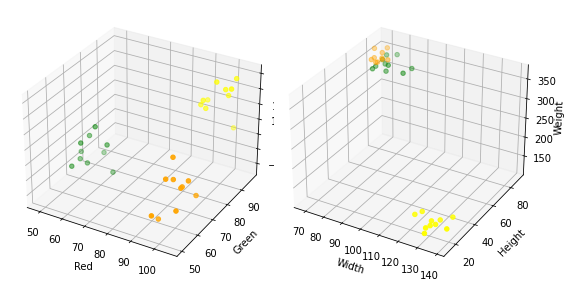

In [10]:





def make3dscatters():
    fig=plt.figure(tight_layout=True,figsize=(8,4))
    ax1 = fig.add_subplot(121, projection='3d') 
    ax2 = fig.add_subplot(122,projection='3d')
    ax1.scatter(feature_values[:,:1], feature_values[:,1:2],feature_values[:,2:3],c=colours, marker='o',label=labels)
    ax1.set_xlabel('Red')
    ax1.set_ylabel('Green')
    ax1.set_zlabel('Blue',rotation=270,labelpad=0)
    ax2.scatter(feature_values[:,3:4], feature_values[:,4:5],feature_values[:,5:6],c=colours, marker='o',label=labels)
    ax2.set_xlabel('Width');
    ax2.set_ylabel('Height'); 
    ax2.set_zlabel('Weight',rotation=270,labelpad=0)
    plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.1)
    return fig
fig = make3dscatters()
plt.show()

## Symbolic AI
Have to write code  that can:
 - extract meaning from these figures
 - to generate True/False for symbols like isLong() or isYellow()
 - those symbols are what used to do reasoning in the model

# Computational AI: 

- **Machine Learning**  creates models using algorithms that learn by trial and error from datasets (examples)
- **Heuristic Optimisation** takes a similar 'trial and error' approach to finding and improving solutions to optimisation problems

## Our fruit example

1. Decide on a set of features you can measure about objects:  
weight in grammes  
height/width in cm  
mean RGB values of image
2. Measure values of those features for a set of examples  
store these in a Dataset (e.g. numpy 2D array).  
one row per example,  
one column for each feature + one column for the label   (orange/apple/banana)  
or put the label in a separate array
3. Apply an algorithm to find decision boundaries that separate the examples into classes    
learned model = set of decision boundaries + labels for the regions they define
4. Make **prediction** by looking at where a new example is in relation to those boundaries

# Summary
## Two different approaches,  both with strengths and weaknesses
 1. Symbolic (Knowledge-based):
  - based on logic, facts and rules
  - uses a human-provided world model
 2. Computational AI
  - Algorithms that learn from experience
  - only as good as their experience
  

## Key Difference: 
In symbolic AI everything 'stands for' something in the real world.

- So you might write a function: Bool  isYellow( inr red, int green, int blue)
 - but it would be meangingless to pass values for width/height/weight into isYellow()
 - and the rules that define the 'fruit' model can't be used for anything else

In Computational AI 'everything is just numbers', 
- nothing has any special meaning
- so algorithms become more re-usable.

## You need to be able to: 
 - **Describe** the differences between these approaches
 - **Select** (and explain) whether to choose a computational or knowledge-based solution  
 to solve a given problem _in it's context_. 
 